# Uçtan Büyük Veride Makine Öğrenmesi
## Spark session ve veri seti

In [157]:
from warnings import filterwarnings
filterwarnings('ignore')

In [158]:
!pip install findspark

In [159]:
import findspark
findspark.init("/Users/mehmetakifkiraz/spark/spark-3.3.1-bin-hadoop3")

In [160]:
import pyspark
from pyspark import SparkContext

In [161]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder \
    .master("local") \
    .appName("churn_modellemesi") \
    .config("spark.executer.memory", "16gb") \
    .getOrCreate()



sc = spark.sparkContext
sc

<SparkContext master=local appName=churn_modellemesi>

In [162]:
spark_df = spark.read.csv("churn.csv", 
                          header = True, 
                          inferSchema = True,
                          sep = ",")
spark_df.cache()


22/11/21 13:39:57 WARN CacheManager: Asked to cache already cached data.


DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [163]:
# yukarıda cacheleme işlemi yaptık

In [164]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [165]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [166]:
spark_df=spark_df.toDF(*[c.lower() for c in spark_df.columns])

In [167]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [168]:
# pandasta ise bu dönüştürme işlemini şöyle yapıyoruz
# df.columns=map(str.lower,df.columns)

In [169]:
spark_df=spark_df.withColumnRenamed("_c0","index")

In [170]:
spark_df.show()

+-----+-------------------+----+--------------+---------------+-----+---------+-----+
|index|              names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------------+----+--------------+---------------+-----+---------+-----+
|    0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|    3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|    4|     Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
|    5|   Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|
|    6|        Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|
|    7|      Zachary Walsh|32.0|       9885.12|              1| 6.92|      9.0|    1|
|    8|        Ashlee Carr|43.0|       14062.6|       

In [171]:
# gözlem sayısına bakıyorum
spark_df.count()

900

In [172]:
len(spark_df.columns)

8

In [173]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [174]:
spark_df.distinct().count()
# bu eşsiz gözlem birimlerini gösteriyor

900

In [175]:
spark_df.select("names").distinct().count()

899

In [176]:
spark_df.groupby("names").count().sort("count",ascending=False).show(3)
# bu şekilde iki olan değeri başa getirdim
# şimdi ise araştırdığımız konu çoklanmış verimi yok farklı bilgiler taşıyan iki verimi

+-------------+-----+
|        names|count|
+-------------+-----+
|Jennifer Wood|    2|
| Patrick Bell|    1|
|Chelsea Marsh|    1|
+-------------+-----+
only showing top 3 rows



In [177]:
spark_df.filter(spark_df.names=="Jennifer Wood").show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [178]:
spark_df.select("names").dropDuplicates().groupBy("names").count().sort("count",ascending = False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|    Patrick Bell|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
+----------------+-----+
only showing top 3 rows



In [179]:
spark_df.where(spark_df.index==439).select("names").show()

+-------------+
|        names|
+-------------+
|Jennifer Wood|
+-------------+



In [180]:
jen = spark_df.where(spark_df.index == 439).collect()[0]["names"]
jen

'Jennifer Wood'

In [181]:
jen1 = spark_df.where(spark_df.index == 439).collect()[0]
jen1

Row(index=439, names='Jennifer Wood', age=48.0, total_purchase=11585.16, account_manager=0, years=4.61, num_sites=9.0, churn=0)

In [182]:
jen2 = spark_df.where(spark_df.index == 439).collect()
jen2

[Row(index=439, names='Jennifer Wood', age=48.0, total_purchase=11585.16, account_manager=0, years=4.61, num_sites=9.0, churn=0)]

In [183]:
type(jen)

str

In [184]:
dir(jen)
# jen'e uygulayabileceğimiz methodlar

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


In [185]:
jen.upper()

'JENNIFER WOOD'

# Keşifci Veri Analizi

In [186]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [187]:
spark_df.select("age","total_purchase", "account_manager", "years","num_sites","churn").describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [188]:
spark_df.filter(spark_df.age>47).show()

+-----+-----------------+----+--------------+---------------+-----+---------+-----+
|index|            names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-----------------+----+--------------+---------------+-----+---------+-----+
|    5| Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|
|   18|   Lindsay Martin|53.0|       5515.09|              0| 6.85|      8.0|    1|
|   21|      Kevin Ramos|56.0|      12217.95|              1| 5.79|     11.0|    1|
|   24|      Lindsey Day|55.0|       11158.5|              1| 4.86|     10.0|    1|
|   25| Steven Hernandez|54.0|        8207.1|              0| 4.26|     11.0|    1|
|   30|     Laura Pierce|54.0|      10661.48|              1| 5.16|      8.0|    1|
|   34|   Tammy Shepherd|48.0|       11740.0|              1| 4.97|     11.0|    1|
|   37|    Thomas Sawyer|48.0|      10367.08|              1| 6.45|     12.0|    1|
|   41|   Jason Jones MD|55.0|      16838.94|              1| 6.66|      8.0

In [189]:
spark_df.filter(spark_df.age>47).count()

161

In [190]:
# şimdi churn bağımlı değişkenine bakıyoruz

In [191]:
spark_df.groupby("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [192]:
spark_df.groupby("churn").agg({"total_purchase":"mean"}).show()
# churn olup olmaması total_purcase'i etkiliyor mu ona bakıyoruz

+-----+-------------------+
|churn|avg(total_purchase)|
+-----+-------------------+
|    1| 10192.179933333337|
|    0| 10036.952853333332|
+-----+-------------------+



In [193]:
spark_df.groupby("churn").agg({"years":"mean"}).show()

+-----+------------------+
|churn|        avg(years)|
+-----+------------------+
|    1|5.8835999999999995|
|    0|5.1510666666666625|
+-----+------------------+



In [194]:
kor_data=spark_df.drop("index","names").toPandas()

In [195]:
kor_data.head()

,age,total_purchase,account_manager,years,num_sites,churn
0,42.0,11066.80,0,7.22,8.0,1
1,41.0,11916.22,0,6.50,11.0,1
2,38.0,12884.75,0,6.67,12.0,1
3,42.0,8010.76,0,6.71,10.0,1
4,37.0,9191.58,0,5.56,9.0,1


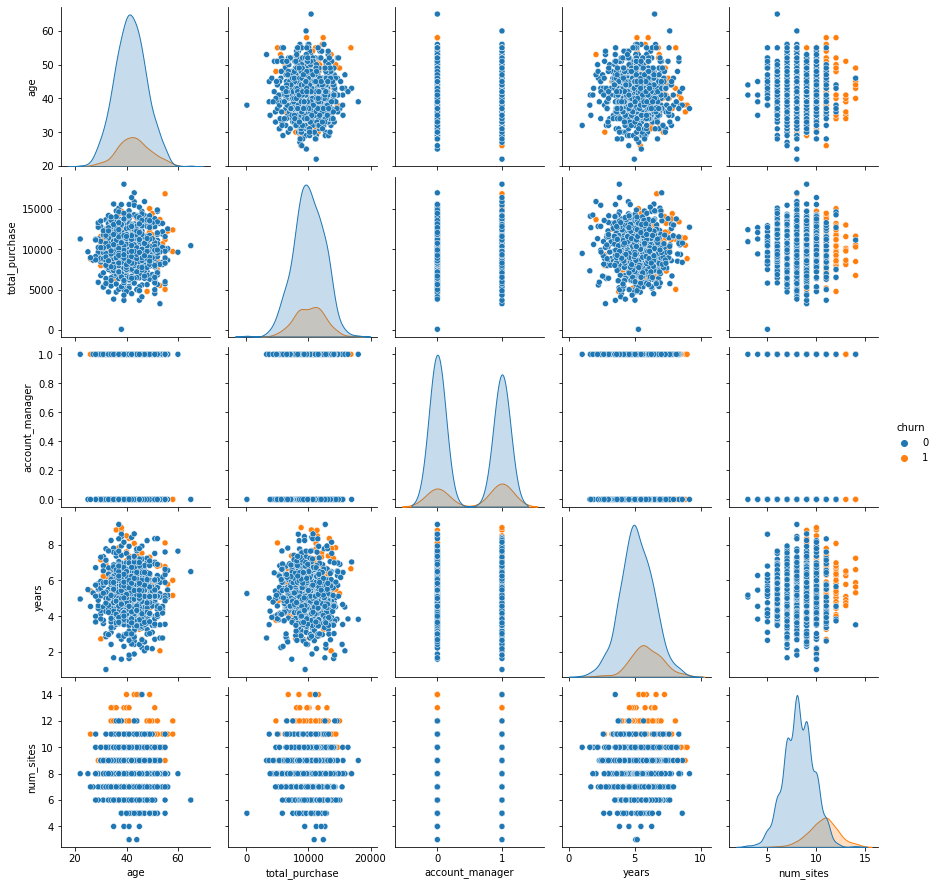

In [196]:
import seaborn as sns
sns.pairplot(kor_data,hue="churn")

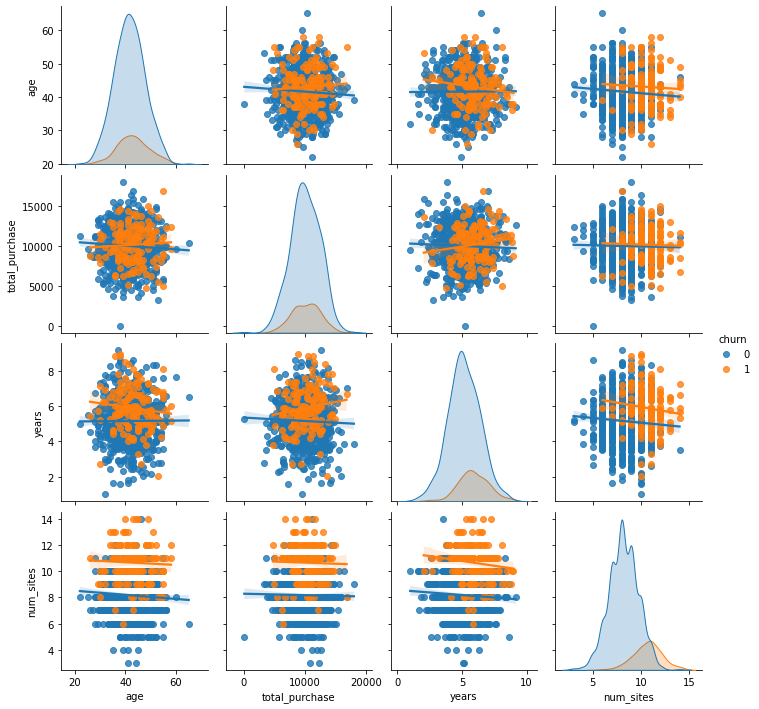

In [197]:
sns.pairplot(kor_data, vars = ["age", "total_purchase","years","num_sites"], 
             hue = "churn",
            kind = "reg");

# Veri Önişleme

In [198]:
spark_df=spark_df.dropna()

In [199]:
spark_df=spark_df.withColumn("age_kare",spark_df.age**2)
spark_df.show(10)
# buraya yeni bir kolon ekliyoruz

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|  1369.0|
|    5|Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|  2304.0|
|    6|     Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|  1936.0|
|    7|   Zachary Walsh|32.0|       9885.12|              1| 6.92|      9.0|    

In [200]:
# şimdi bağımsız değişkeni oluşturacağız
from pyspark.ml.feature import StringIndexer

In [201]:
stringIndexer=StringIndexer(inputCol="churn",outputCol="label")

In [202]:
?stringIndexer

Type:           StringIndexer
String form:    StringIndexer_d10ec578e3a8
File:           ~/spark/spark-3.3.1-bin-hadoop3/python/pyspark/ml/feature.py
Docstring:     
A label indexer that maps a string column of labels to an ML column of label indices.
If the input column is numeric, we cast it to string and index the string values.
The indices are in [0, numLabels). By default, this is ordered by label frequencies
so the most frequent label gets index 0. The ordering behavior is controlled by
setting :py:attr:`stringOrderType`. Its default value is 'frequencyDesc'.

.. versionadded:: 1.4.0

Examples
--------
>>> stringIndexer = StringIndexer(inputCol="label", outputCol="indexed",
...     stringOrderType="frequencyDesc")
>>> stringIndexer.setHandleInvalid("error")
StringIndexer...
>>> model = stringIndexer.fit(stringIndDf)
>>> model.setHandleInvalid("error")
StringIndexerModel...
>>> td = model.transform(stringIndDf)
>>> sorted(set([(i[0], i[1]) for i in td.select(td.id, td.indexed).col

In [203]:
indexed=stringIndexer.fit(spark_df).transform(spark_df)

In [204]:
indexed.show(4)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|label|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|  1.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|  1.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|  1.0|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|  1.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
only showing top 4 rows



In [205]:
indexed.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'double')]

In [206]:
# şimdi ise label'ın double olan veri tipini integer a dönüştüreceğiz

In [207]:
spark_df=indexed.withColumn("label",indexed["label"].cast("integer"))

In [208]:
spark_df.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'int')]

In [209]:
spark_df.show(4)
# şuanda bağımlı değişkenimizi ayarladık

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|label|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
only showing top 4 rows



In [210]:
# şimdi bağımsız değişkenleri ayarlıyoruz
from pyspark.ml.feature import VectorAssembler

In [211]:
spark_df.columns
# değişkenleri listeledim

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_kare',
 'label']

In [212]:
bag = ["age","total_purchase", "account_manager","years","num_sites"]

In [213]:
vectorAssembler = VectorAssembler(inputCols = bag, outputCol = "features")
# şimdi burada dönüştürme işlemi yapıyoruz

In [214]:
va_df=vectorAssembler.transform(spark_df)

In [215]:
final_df=va_df.select(["features","label"])

In [216]:
final_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
|[48.0,10356.02,0....|    1|
|[44.0,11331.58,1....|    1|
|[32.0,9885.12,1.0...|    1|
|[43.0,14062.6,1.0...|    1|
|[40.0,8066.94,1.0...|    1|
|[30.0,11575.37,1....|    1|
|[45.0,8771.02,1.0...|    1|
|[45.0,8988.67,1.0...|    1|
|[40.0,8283.32,1.0...|    1|
|[41.0,6569.87,1.0...|    1|
|[38.0,10494.82,1....|    1|
|[45.0,8213.41,1.0...|    1|
|[43.0,11226.88,0....|    1|
|[53.0,5515.09,0.0...|    1|
|[46.0,8046.4,1.0,...|    1|
+--------------------+-----+
only showing top 20 rows



# Test-Train ayırma

In [217]:
splits=final_df.randomSplit([0.7,0.3])
splits

[DataFrame[features: vector, label: int],
 DataFrame[features: vector, label: int]]

In [218]:
train_df=splits[0]
train_df

DataFrame[features: vector, label: int]

In [219]:
test_df=splits[1]
test_df

DataFrame[features: vector, label: int]

# GBM ile müşteri terk modellemesi 

In [220]:
from pyspark.ml.classification import GBTClassifier

In [221]:
gbm=GBTClassifier(maxIter=10,featuresCol="features",labelCol="label")
# model nesnesi oluşturuyoruz

In [222]:
gbm_model=gbm.fit(train_df)

In [223]:
y_pred=gbm_model.transform(test_df)

In [224]:
y_pred

DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [225]:
ac=y_pred.select("label","prediction")

In [226]:
ac.filter(ac.label==ac.prediction).count()/ac.count()

0.8629629629629629

In [227]:
# bu sonuç doğru kabul edilmez çünkü cross validation gibi doğrulama yöntemi kullanılmadı

In [228]:
# şimdi model tuning işlemlerini yapacağız

In [229]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder()
             .addGrid(gbm.maxDepth, [2, 4, 6])
             .addGrid(gbm.maxBins, [20, 30])
             .addGrid(gbm.maxIter, [10, 20])
             .build())

cv = CrossValidator(estimator= gbm, estimatorParamMaps = paramGrid, evaluator=evaluator, numFolds= 10)

In [230]:
cv_model=cv.fit(train_df)

22/11/21 13:41:00 WARN Executor: Issue communicating with driver in heartbeater
java.lang.NullPointerException: Cannot invoke "org.apache.spark.storage.memory.MemoryEntry.size()" because the return value of "java.util.LinkedHashMap.get(Object)" is null
	at org.apache.spark.storage.memory.MemoryStore.getSize(MemoryStore.scala:133)
	at org.apache.spark.storage.BlockManager.org$apache$spark$storage$BlockManager$$getCurrentBlockStatus(BlockManager.scala:890)
	at org.apache.spark.storage.BlockManager.$anonfun$reportAllBlocks$3(BlockManager.scala:625)
	at org.apache.spark.storage.BlockManager.$anonfun$reportAllBlocks$3$adapted(BlockManager.scala:624)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at org.apache.spark.storage.BlockManager.reportAllBlocks(BlockManager.scala:624)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:644)
	at 

In [231]:
y_pred=cv_model.transform(test_df)

In [232]:
ac=y_pred.select("label","prediction")

In [233]:
ac.filter(ac.label==ac.prediction).count()/ac.count()

0.8851851851851852

In [234]:
evaluator.evaluate(y_pred)

0.8670555108608206

# Bu müşteriler bizi terk eder mi?

In [235]:
import pandas as pd
names = pd.Series(["Ali Ahmetoğlu", "Berkcan Tanerbey", "Harika Gündüz","Polat Alemdar", "Ata Bakmayan Ali"])
age = pd.Series([38, 43, 34, 50, 40])
total_purchase = pd.Series([30000, 10000, 6000, 30000, 100000])
account_manager = pd.Series([1,0,0,1,1])
years = pd.Series([20, 10, 3, 8, 30])
num_sites = pd.Series([30,8,8,6,50])


yeni_musteriler = pd.DataFrame({
    'names':names,
    'age': age,
    'total_purchase': total_purchase,
    'account_manager': account_manager ,
    'years': years,
    'num_sites': num_sites})

yeni_musteriler.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [236]:
yeni_musteriler

,names,age,total_purchase,account_manager,years,num_sites
0,Ali Ahmetoğlu,38,30000,1,20,30
1,Berkcan Tanerbey,43,10000,0,10,8
2,Harika Gündüz,34,6000,0,3,8
3,Polat Alemdar,50,30000,1,8,6
4,Ata Bakmayan Ali,40,100000,1,30,50


In [237]:
# şimdi pandastan sql dataframe'e dönüşüm yapacağız
yeni_sdf=spark.createDataFrame(yeni_musteriler)

In [238]:
type(yeni_sdf)

pyspark.sql.dataframe.DataFrame

In [239]:
yeni_sdf.show()

+----------------+---+--------------+---------------+-----+---------+
|           names|age|total_purchase|account_manager|years|num_sites|
+----------------+---+--------------+---------------+-----+---------+
|   Ali Ahmetoğlu| 38|         30000|              1|   20|       30|
|Berkcan Tanerbey| 43|         10000|              0|   10|        8|
|   Harika Gündüz| 34|          6000|              0|    3|        8|
|   Polat Alemdar| 50|         30000|              1|    8|        6|
|Ata Bakmayan Ali| 40|        100000|              1|   30|       50|
+----------------+---+--------------+---------------+-----+---------+



In [240]:
# yeni müşterileri vektör formuna dönüştüreceğim
yeni_musteriler=vectorAssembler.transform(yeni_sdf)

In [241]:
sonuclar=cv_model.transform(yeni_musteriler)
# burada tahmin işlemi yapıyoruz

In [242]:
sonuclar.select("names","prediction").show

<bound method DataFrame.show of DataFrame[names: string, prediction: double]>